This is a Jupyter notebook to visualze the Fourier series for a constant function $ V(y) = V_0 $
for the range (0,1)

It was written and tested using Python 3.7.6 in September, 2021 by Mike Sokoloff.

The purpose is to make plots plots of $ \sum_n V_n(y) $ where the $ V_n(y) $ are the
Fourier components 

$ V_n (y) = \frac{4 V_0}{\pi} \frac{1}{n} \, \sin{  n \pi y /a } $

If you are new to Python and want an online resource, you may find
[w3schools](https://www.w3schools.com/PYTHON/) very useful.

***

In the cell below, the code imports libraries that will be used for doing calculations and making plots.

[numpy.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) creates a list of evenly spaced values

[math](https://docs.python.org/3/library/math.html) provides access to constants and mathematical functions

[matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) is the workhorse for plotting in scientific Python

[pylab](https://matplotlib.org/2.0.2/faq/usage_faq.html#matplotlib-pyplot-and-pylab-how-are-they-related) pylab is a convenience module that bulk imports matplotlib.pyplot (for plotting) and numpy (for mathematics and working with arrays) in a single name space. Although many examples use pylab, it is no longer recommended. But it does what we want here. *Caveat Emptor*

[mpl_toolkits.mplot3d](https://matplotlib.org/2.2.2/mpl_toolkits/index.html)  provides some basic 3D plotting


In [21]:
import numpy as np
import math
import matplotlib.pyplot as plt
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

from mpl_toolkits.mplot3d import Axes3D

In [86]:
## here, we define a sum of Fourier components
## the first argument is the value of "y" 
## in the range (0,1) where the function will
## be evaluated.
##
## the second argument is the number of non-zero
## Fourier components to be summed
##
## note that only odd "n" have non-zero V_n contributions
## for for each m we want to calculate the corresponding
## oddNumber (n) to use in the sum

def V(y,m):
    terms = np.zeros(m)
    for ii in range(m):
##        print("2*(ii-1)-1 = ",2*(ii+1)-1)
        oddNumber = 2*(ii+1)-1
        terms[ii] =  (1./oddNumber)*math.sin(oddNumber*math.pi*y)
##        print("(1./oddNumber = ",(1./oddNumber))
##        print("calculated term = ",(1./oddNumber)*math.sin(oddNumber*math.pi*y))
##        print("ii,jj,terms[ii] = ",ii,oddNumber,terms[ii])
##    print("terms = ",terms)
    sum = (4/math.pi)*np.sum(terms)
    return sum
    
            

In [92]:
## print V(y,m) for y = 0.4 and various m
## to develop some intuition for how quickly
## the series converges

print("V(0.4,1)   = ",V(0.5,1))
print("V(0.4,2)   = ",V(0.5,2))
print("V(0.4,3)   = ",V(0.5,3))
print("V(0.4,5)   = ",V(0.5,5))
print("V(0.4,10)  = ",V(0.5,10))
print("V(0.4,20)  = ",V(0.5,20))
print("V(0.4,50)  = ",V(0.5,50))
print("V(0.4,100) = ",V(0.5,100))
print("V(0.4,200) = ",V(0.5,200))

V(0.4,1)   =  1.2732395447351628
V(0.4,2)   =  0.8488263631567753
V(0.4,3)   =  1.1034742721038078
V(0.4,5)   =  1.0630539690963425
V(0.4,10)  =  0.9682476228907633
V(0.4,20)  =  0.9840944220235376
V(0.4,50)  =  0.9936344385781742
V(0.4,100) =  0.9968169807056892
V(0.4,200) =  0.9984084605159539


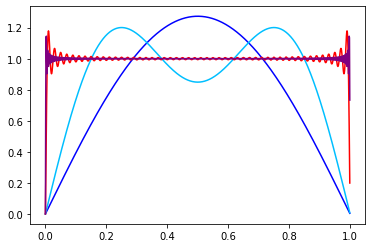

In [93]:
## create an array of y values with 1000 entries
yValues = np.arange(0,1,0.001)
##print(yValues)


## fill vFunc1 with V(y,1) for each of 1000 values
vFunc1 = np.zeros(len(yValues))
for ii in range(len(yValues)):
    x = V(yValues[ii],1)
    vFunc1[ii] = x

    
## and for  V(y,2)
vFunc2 = np.zeros(len(yValues))
for ii in range(len(yValues)):
    x = V(yValues[ii],2)
    vFunc2[ii] = x
    
vFunc50 = np.zeros(len(yValues))
for ii in range(len(yValues)):
    x = V(yValues[ii],50)
    vFunc50[ii] = x
    
vFunc200 = np.zeros(len(yValues))
for ii in range(len(yValues)):
    x = V(yValues[ii],200)
    vFunc200[ii] = x

    
## plot the functions of (y,m)    
plt.plot(yValues,vFunc1,"b")
plt.plot(yValues,vFunc2,"deepskyblue")
plt.plot(yValues,vFunc50,"red")
plt.plot(yValues,vFunc200,"purple")


In [95]:
## for each function (y,m), calculate the root-mean-square (rms)
## deviation over the range calculated and print the
## value; the rms deviation from the target value is
## a standard metric for evaluating the quality of
## of a description

rms_1 = np.sqrt(np.divide(np.sum(np.square(vFunc1-1)),len(vFunc1)))
print("rms_1 = ",rms_1)
print(" ")
rms_2 = np.sqrt(np.divide(np.sum(np.square(vFunc2-1)),len(vFunc1)))
print("rms_2 = ",rms_2)
print("  ")
rms_50 = np.sqrt(np.divide(np.sum(np.square(vFunc50-1)),len(vFunc1)))
print("rms_50 = ",rms_50)
print(" ")
rms_200 = np.sqrt(np.divide(np.sum(np.square(vFunc200-1)),len(vFunc1)))
print("rms_200 = ",rms_200)
print("  ")

rms_1 =  0.4352377099871408
 
rms_2 =  0.3152299528620544
  
rms_50 =  0.06418267319459252
 
rms_200 =  0.035808799900796356
  
